## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 8: Clustering Anlysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## Clustering Model


### Clustering Example using a 2-dimensional dataset

In [2]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
BM = report_df.year == 2019
report2019_df = report_df[BM]

In [3]:
report2019_df

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
9,Afghanistan,Asia,2019,38041754.0,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
19,Albania,Europe,2019,2854191.0,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
29,Algeria,Africa,2019,43053054.0,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
39,Argentina,South America,2019,44938712.0,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
49,Armenia,Europe,2019,2957731.0,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Uruguay,South America,2019,3461734.0,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,0.889,0.222
1189,Uzbekistan,Asia,2019,33580650.0,6.154,8.853,0.915,65.4,0.970,0.304,0.511,0.845,0.220
1199,Vietnam,Asia,2019,96462106.0,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186
1209,Zambia,Africa,2019,17861030.0,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394


<AxesSubplot: xlabel='Perceptions_of_corruption', ylabel='Life_Ladder'>

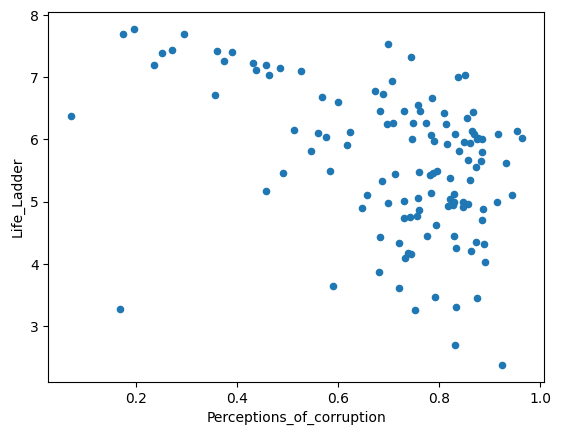

In [4]:
report2019_df.plot.scatter(x='Perceptions_of_corruption',y='Life_Ladder')

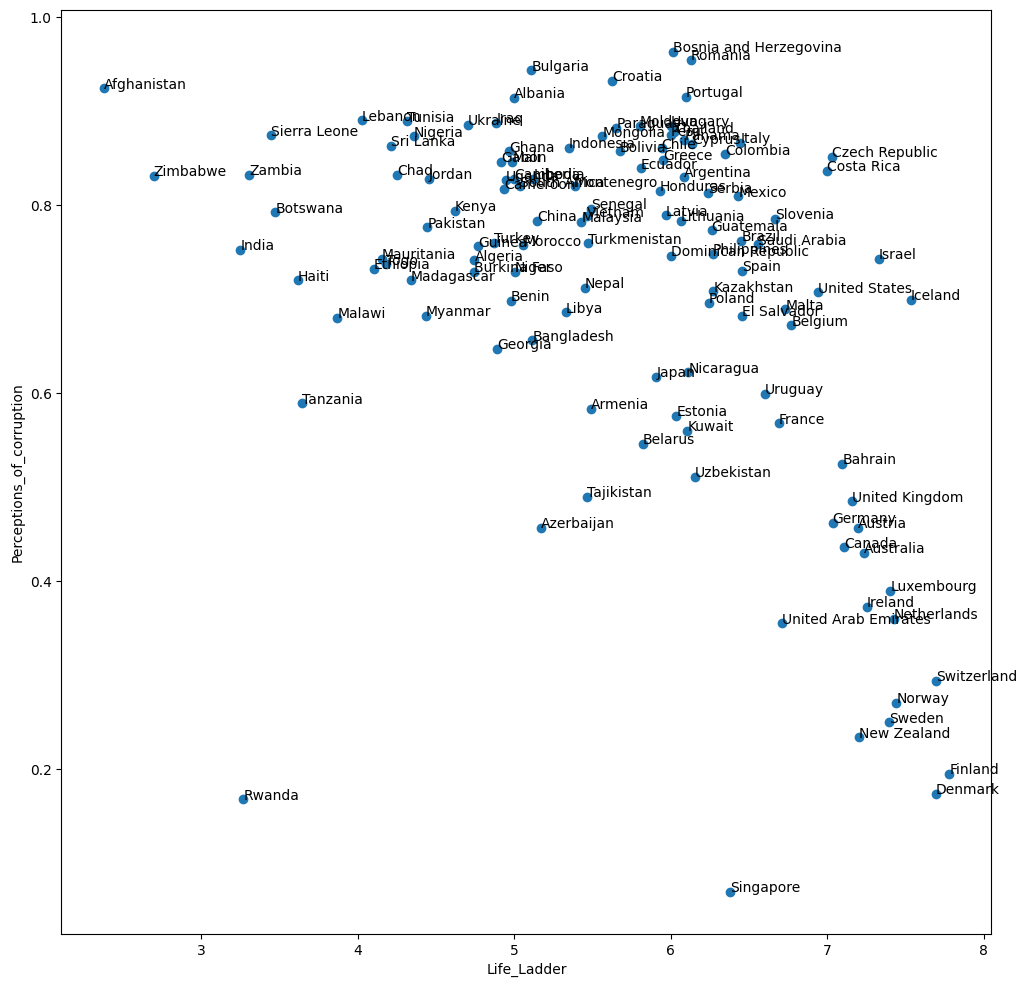

In [5]:
plt.figure(figsize=(12,12))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption)

for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))

plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')

plt.show()

### Clustering Example using a 3-dimensional dataset

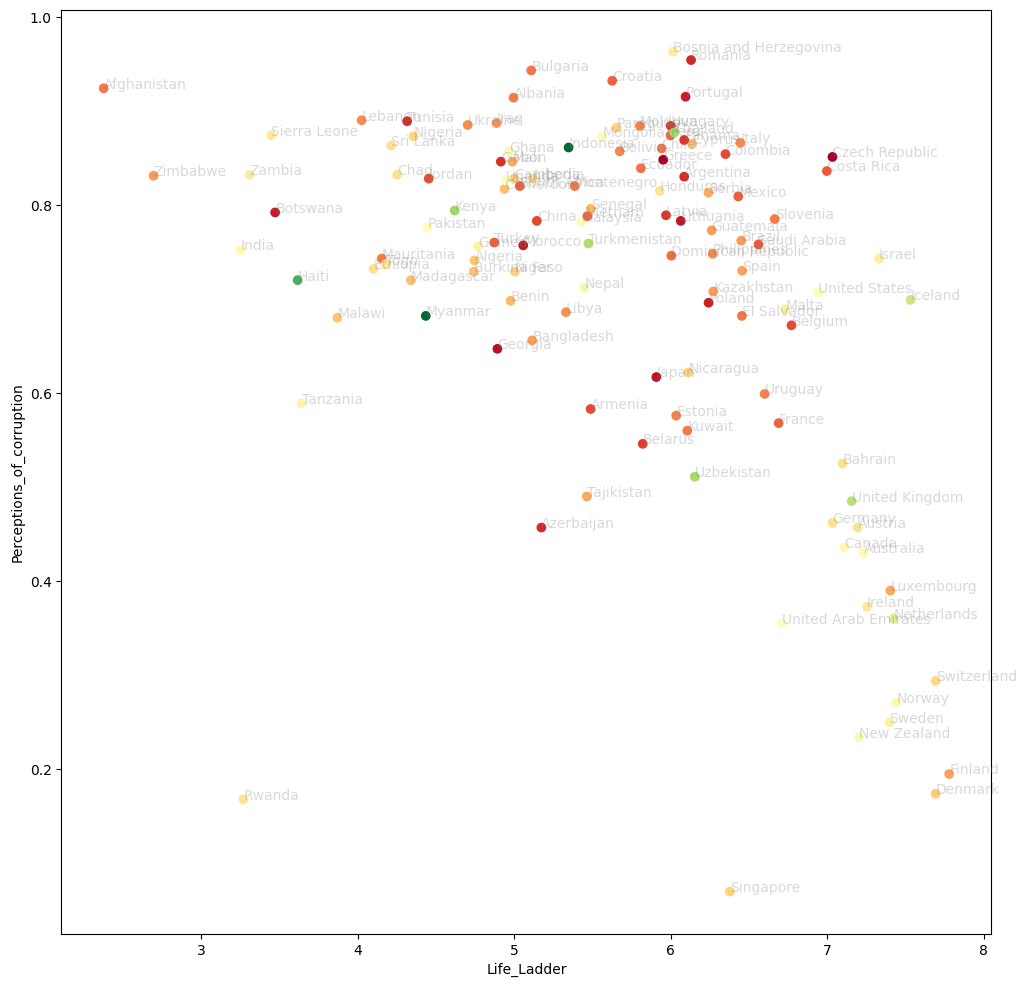

In [6]:
plt.figure(figsize=(12,12))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption, c=report2019_df.Generosity,cmap='RdYlGn')
for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder,
                 row.Perceptions_of_corruption),
                 c='grey',alpha=0.3)
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()


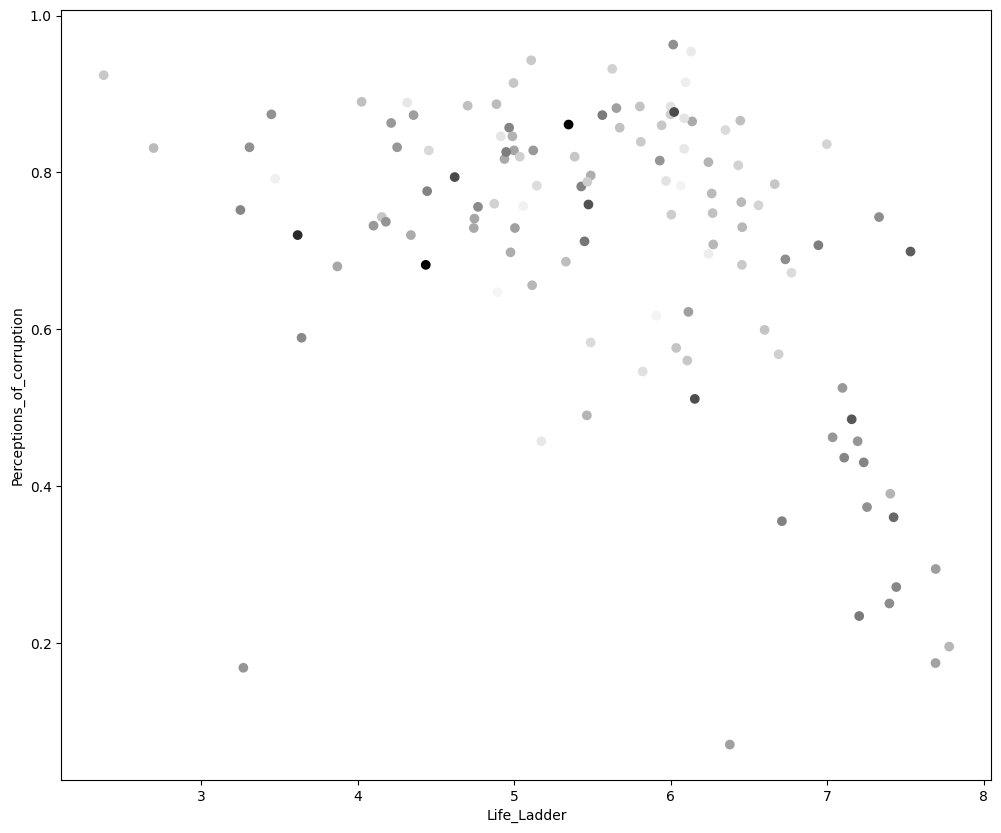

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption,c=report2019_df.Generosity,cmap='binary')

plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')

plt.show()

## K-Means Algorithm

### Using K-Means to cluster a 2-dimensional dataset

In [8]:
from sklearn.cluster import KMeans
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [12]:
for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Argentina' 'Belarus' 'Bolivia' 'Bosnia and Herzegovina' 'Chile'
 'Croatia' 'Cyprus' 'Dominican Republic' 'Ecuador' 'Estonia' 'Greece'
 'Guatemala' 'Honduras' 'Hungary' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia'
 'Lithuania' 'Moldova' 'Mongolia' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Thailand'
 'Uzbekistan']
Cluster 1: ['Chad' 'Ethiopia' 'Jordan' 'Kenya' 'Lebanon' 'Madagascar' 'Malawi'
 'Mauritania' 'Myanmar' 'Nigeria' 'Pakistan' 'Sri Lanka' 'Togo' 'Tunisia']
Cluster 2: ['Australia' 'Austria' 'Bahrain' 'Canada' 'Denmark' 'Finland' 'Germany'
 'Iceland' 'Ireland' 'Israel' 'Luxembourg' 'Netherlands' 'New Zealand'
 'Norway' 'Sweden' 'Switzerland' 'United Kingdom']
Cluster 3: ['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia'
 'Ghana' 'Guinea' 'Indonesia' 'Iraq' 'Liberia' 'Libya' 'Malaysia' 'Mali'
 'Montenegro' 'Morocco' 'Nepal' 'Niger' 'Sen

In [13]:
from sklearn.cluster import KMeans
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)

for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Argentina' 'Belarus' 'Bolivia' 'Bosnia and Herzegovina' 'Chile'
 'Colombia' 'Croatia' 'Cyprus' 'Dominican Republic' 'Ecuador' 'Estonia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Japan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lithuania' 'Moldova' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Thailand'
 'Uzbekistan']
Cluster 1: ['Afghanistan' 'Botswana' 'Haiti' 'India' 'Rwanda' 'Sierra Leone'
 'Tanzania' 'Zambia' 'Zimbabwe']
Cluster 2: ['Chad' 'Ethiopia' 'Jordan' 'Kenya' 'Lebanon' 'Madagascar' 'Malawi'
 'Mauritania' 'Myanmar' 'Nigeria' 'Pakistan' 'Sri Lanka' 'Togo' 'Tunisia'
 'Ukraine']
Cluster 3: ['Australia' 'Austria' 'Bahrain' 'Canada' 'Denmark' 'Finland' 'Germany'
 'Iceland' 'Ireland' 'Israel' 'Luxembourg' 'Netherlands' 'New Zealand'
 'Norway' 'Sweden' 'Switzerland' 'United Kingdom']
Cluster 4: ['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georg

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


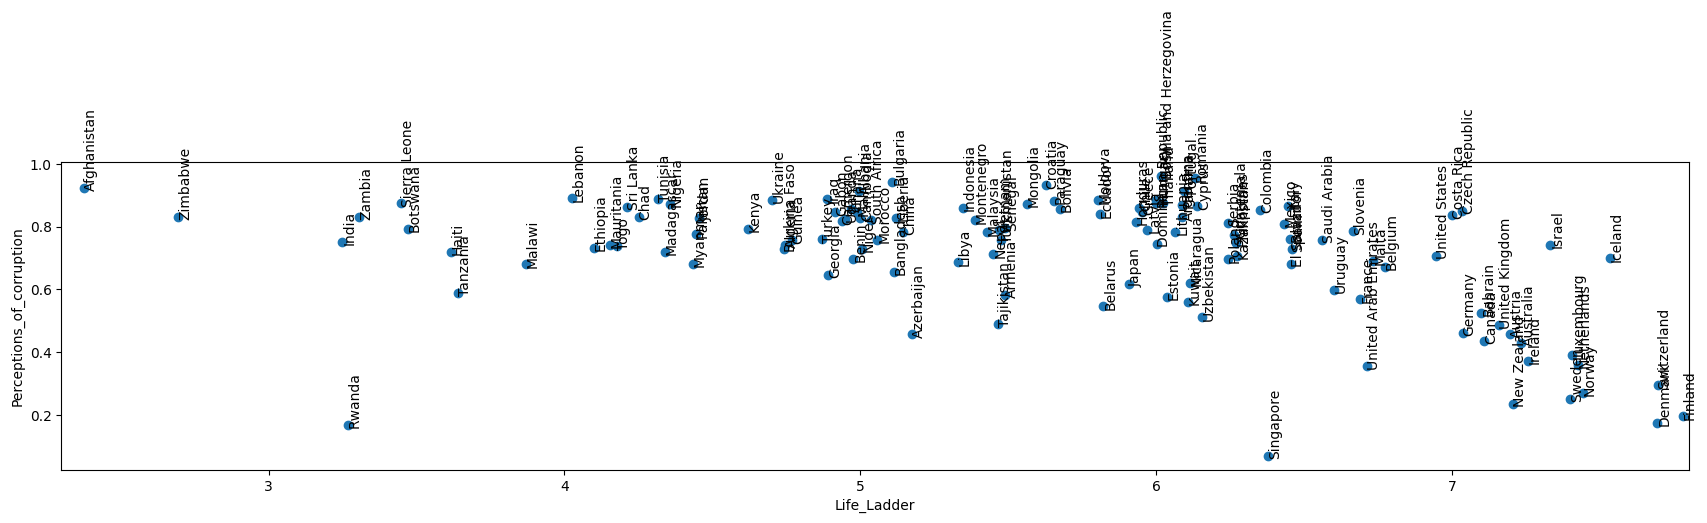

In [14]:
plt.figure(figsize=(21,4))
plt.scatter(report2019_df.Life_Ladder, report2019_df.Perceptions_of_corruption)
for _, row in report2019_df.iterrows():
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption),rotation=90)
plt.xlim([2.3,7.8])
plt.xlabel('Life_Ladder')
plt.ylabel('Perceptions_of_corruption')
plt.show()

In [15]:
dimensions = ['Life_Ladder','Perceptions_of_corruption']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xs)

for i in range(6):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Armenia' 'Azerbaijan' 'Bahrain' 'Belarus' 'Belgium' 'El Salvador'
 'Estonia' 'France' 'Iceland' 'Israel' 'Japan' 'Kazakhstan' 'Kuwait'
 'Malta' 'Nicaragua' 'Poland' 'Spain' 'Tajikistan' 'United States'
 'Uruguay' 'Uzbekistan']
Cluster 1: ['Afghanistan' 'Botswana' 'Ethiopia' 'Haiti' 'India' 'Lebanon' 'Malawi'
 'Mauritania' 'Sierra Leone' 'Tanzania' 'Togo' 'Zambia' 'Zimbabwe']
Cluster 2: ['Argentina' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Chile'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Greece' 'Guatemala' 'Honduras' 'Hungary'
 'Italy' 'Latvia' 'Lithuania' 'Mexico' 'Moldova' 'Mongolia' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Portugal' 'Romania' 'Saudi Arabia'
 'Serbia' 'Slovenia' 'Thailand']
Cluster 3: ['Albania' 'Algeria' 'Bangladesh' 'Benin' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Chad' 'China' 'Gabon' 'Georgia' 'Ghana' 'Guinea'
 'Indonesia' 'Iraq' 'Jordan' 'Kenya' 'Liberia' 'Libya' 'Madagascar'
 'Malay

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Using K-Means to cluster a dataset with more than 2 dimensions

In [16]:
dimensions = [ 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
              'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
              'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)

for i in range(3):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,report2019_df[BM].Name.values))

Cluster 0: ['Australia' 'Austria' 'Bahrain' 'Canada' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Iceland' 'Ireland' 'Luxembourg' 'Netherlands'
 'New Zealand' 'Norway' 'Singapore' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uruguay'
 'Uzbekistan']
Cluster 1: ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Belarus'
 'Belgium' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Georgia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Indonesia' 'Israel' 'Italy'
 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Libya' 'Lithuania' 'Malaysia'
 'Malta' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Nicaragua' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania'
 'Saudi Arabia' 'Serbia' 'Slovenia' 'South Africa' 'Spain' 'Sri Lanka'
 'Tajikistan' 'Thailand' 'Turkey' 'Turkmenistan' 'Ukraine' 'Vietnam']
Cl

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Centroid Analysis

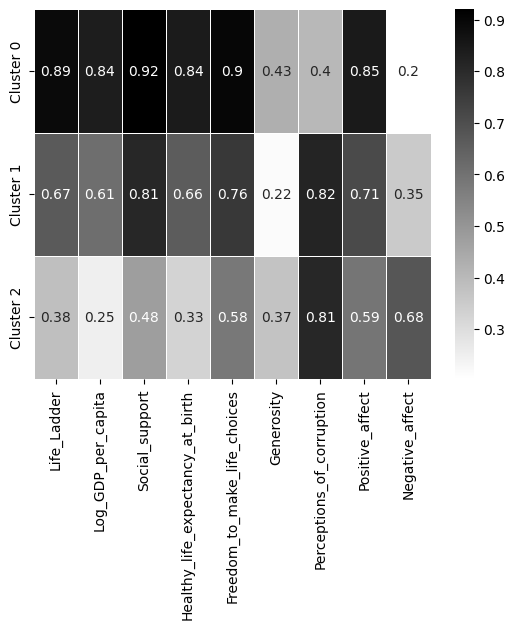

In [17]:
import seaborn as sns
clusters = ['Cluster {}'.format(i) for i in range(3)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()